Percentage error:
0.010539386709536025


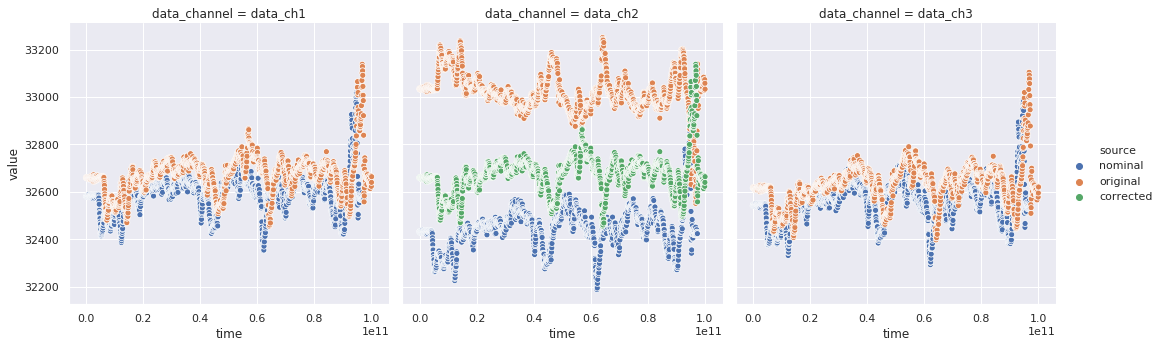

In [49]:
bad = r"~/brass/instrumentation-test-data/mkz/data/forward/switched_01"
corrected = r"~/demo/cra/forward_switched_01_adapted_data.txt"
nominal = r"~/brass/instrumentation-test-data/mkz/data/forward/normal_02"

%run CSV_DataVizualizer.py -b $bad -bc $corrected -bn $nominal